##Задание 4. Сокращение признакового пространства (Assessment 4. Dimensionality Reducing)

# Импорт библиотек

In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.4 MB/s eta 0:00:00


https://colab.research.google.com/drive/12jGZjpX0hAqQJWMXHaMD1fFcuHUqsn2K?usp=sharing

https://colab.research.google.com/drive/12jGZjpX0hAqQJWMXHaMD1fFcuHUqsn2K?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE
from umap.umap_ import UMAP
from sklearn.preprocessing import StandardScaler

# Обработка выборки

## Data source: Аренда велосипедов  
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset, предсказываемое значение – количество аренд велосипедов в сутки (Area), файл day.csv;

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/day.csv')
features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
X = data[features]

In [ ]:
X.head(10)


temp     atemp       hum  windspeed  casual  registered   cnt
0  0.344167  0.363625  0.805833   0.160446     331         654   985
1  0.363478  0.353739  0.696087   0.248539     131         670   801
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600
5  0.204348  0.233209  0.518261   0.089565      88        1518  1606
6  0.196522  0.208839  0.498696   0.168726     148        1362  1510
7  0.165000  0.162254  0.535833   0.266804      68         891   959
8  0.138333  0.116175  0.434167   0.361950      54         768   822
9  0.150833  0.150888  0.482917   0.223267      41        1280  1321

In [ ]:
X.describe()


temp       atemp         hum   windspeed       casual  \
count  731.000000  731.000000  731.000000  731.000000   731.000000   
mean     0.495385    0.474354    0.627894    0.190486   848.176471   
std      0.183051    0.162961    0.142429    0.077498   686.622488   
min      0.059130    0.079070    0.000000    0.022392     2.000000   
25%      0.337083    0.337842    0.520000    0.134950   315.500000   
50%      0.498333    0.486733    0.626667    0.180975   713.000000   
75%      0.655417    0.608602    0.730209    0.233214  1096.000000   
max      0.861667    0.840896    0.972500    0.507463  3410.000000   

        registered          cnt  
count   731.000000   731.000000  
mean   3656.172367  4504.348837  
std    1560.256377  1937.211452  
min      20.000000    22.000000  
25%    2497.000000  3152.000000  
50%    3662.000000  4548.000000  
75%    4776.500000  5956.000000  
max    6946.000000  8714.000000

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        731 non-null    float64
 1   atemp       731 non-null    float64
 2   hum         731 non-null    float64
 3   windspeed   731 non-null    float64
 4   casual      731 non-null    int64  
 5   registered  731 non-null    int64  
 6   cnt         731 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 40.1 KB


In [ ]:
X.isna().sum()

temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Снижение размерности признакового пространства с помощью методов MDS, ISOMAP, LLE, T-SNE и UMAP в пространства 2D и 3D

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


- scaler = StandardScaler()

  - StandardScaler: Это инструмент из модуля sklearn.preprocessing в Python. Он используется в машинном обучении для подготовки данных перед их подачей в модель. В частности, он используется для масштабирования признаков, которое представляет собой способ стандартизации диапазона независимых переменных или признаков данных.
  - scaler: Это переменная, которую мы создаем для хранения экземпляра объекта StandardScaler. Думайте об этом как об инструменте, который мы будем использовать позже.

- X_scaled = scaler.fit_transform(X)

  - fit_transform(): Этот метод делает две вещи:
    - fit: Он вычисляет среднее значение (average) и стандартное отклонение для каждого признака (столбца) в вашем наборе данных X. Эти значения сохраняются внутри объекта scaler.
    - transform: Он применяет масштабирование, используя вычисленное среднее значение и стандартное отклонение для центрирования и масштабирования данных. Это делается путем вычитания среднего значения каждого признака из каждого значения, а затем деления на стандартное отклонение.
- X_scaled: Это новая переменная, в которой мы храним преобразованные данные. Эти данные теперь масштабированы со средним значением 0 и стандартным отклонением 1 для каждого признака.

# Двумерные и трехмерные визуализации преобразований

In [ ]:
def visualize_2D(embedding, title="2D Visualization"):
    plt.figure(figsize=(5, 4))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], cmap='tab10', s=15, alpha=0.7)

    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

def visualize_3D(embedding, title="3D Visualization"):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], cmap='tab10', s=15, alpha=0.7)

    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    plt.show()


Visualize_2D

- def visualize_2D(embedding, title="2D Visualization"):: Эта строка определяет функцию с именем visualize_2D. Она принимает два аргумента:
  - embedding: Это данные, которые будут отображены на графике. Ожидается, что это будет массив NumPy или аналогичная структура данных с двумя столбцами, представляющими координаты x и y точек.
  - title: Это необязательный аргумент, который задает заголовок графика. Если он не указан, по умолчанию используется "2D Visualization" (2D Визуализация).

- plt.figure(figsize=(5, 4)): Эта строка создает новую фигуру для графика с определенным размером (5 дюймов в ширину, 4 дюйма в высоту).

- scatter = plt.scatter(embedding[:, 0], embedding[:, 1], cmap='tab10', s=15, alpha=0.7): Это ядро функции. Здесь используется plt.scatter для создания точечной диаграммы:
  - embedding[:, 0] выбирает все строки (: ) и первый столбец (0) данных embedding для координат x.
  - embedding[:, 1] выбирает все строки и второй столбец для координат y.
  - cmap='tab10' задает цветовую карту для точек. 'tab10' - это встроенная цветовая карта с 10 различными цветами.
  - s=15 задает размер точек равным 15.
  - alpha=0.7 задает прозрачность точек равной 70%.

- plt.title(title): Эта строка устанавливает заголовок графика, используя аргумент title.
- plt.xlabel('Component 1'): Устанавливает метку для оси x.
- plt.ylabel('Component 2'): Устанавливает метку для оси y.

<br>
visualize_3D

- def visualize_3D(embedding, title="3D Visualization"):: Определяет функцию, принимая данные embedding и необязательный аргумент title.
- from mpl_toolkits.mplot3d import Axes3D: Импортирует класс Axes3D, необходимый для построения 3D графиков.
- fig = plt.figure(figsize=(6, 5)): Создает новую фигуру.
- ax = fig.add_subplot(111, projection='3d'): Добавляет 3D подграфик к фигуре.
- scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], cmap='tab10', s=15, alpha=0.7): Создает 3D точечную диаграмму, используя ax.scatter. Она использует первые три столбца данных embedding для координат x, y и z.
- ax.set_title(title), ax.set_xlabel('Component 1'), ax.set_ylabel('Component 2'), ax.set_zlabel('Component 3'): Устанавливает заголовок и метки осей для 3D графика.

<ipython-input-12-cbbb3b46dc80>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(embedding[:, 0], embedding[:, 1], cmap='tab10', s=15, alpha=0.7)


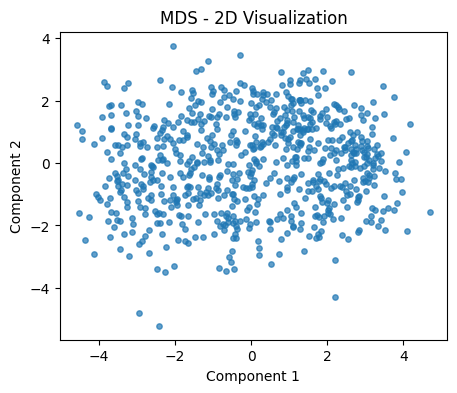

<ipython-input-12-cbbb3b46dc80>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(embedding[:, 0], embedding[:, 1], cmap='tab10', s=15, alpha=0.7)


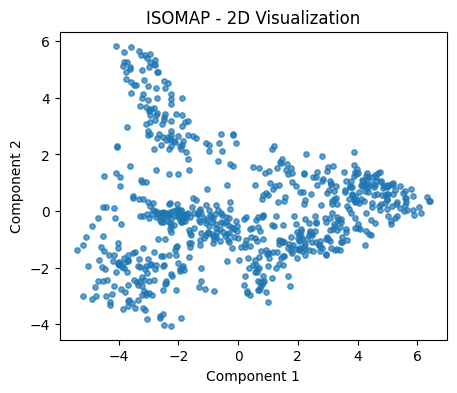

<ipython-input-12-cbbb3b46dc80>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(embedding[:, 0], embedding[:, 1], cmap='tab10', s=15, alpha=0.7)


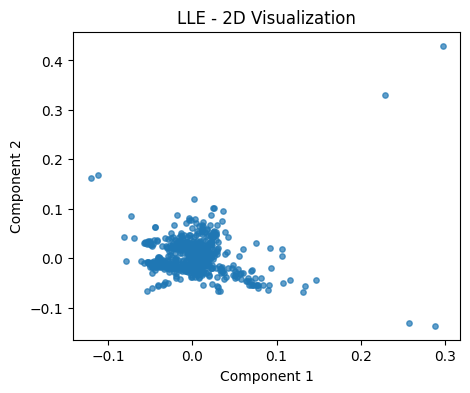

<ipython-input-12-cbbb3b46dc80>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(embedding[:, 0], embedding[:, 1], cmap='tab10', s=15, alpha=0.7)


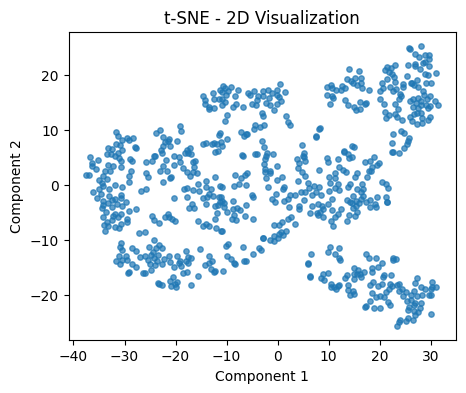

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-12-cbbb3b46dc80>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(embedding[:, 0], embedding[:, 1], cmap='tab10', s=15, alpha=0.7)


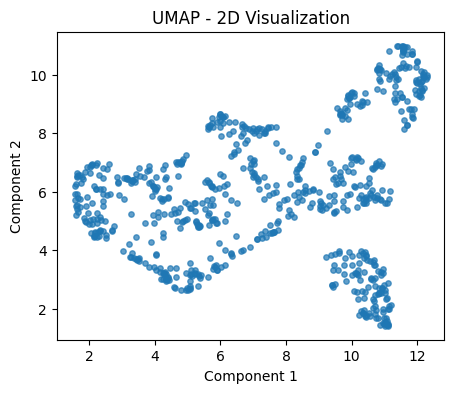

In [ ]:
methods = {
    "MDS": MDS(n_components=2, random_state=42),
    "ISOMAP": Isomap(n_components=2),
    "LLE": LocallyLinearEmbedding(n_components=2, random_state=42),
    "t-SNE": TSNE(n_components=2, random_state=42),
    "UMAP": UMAP(n_components=2, random_state=42)
}

for name, method in methods.items():
    embedding_2D = method.fit_transform(X_scaled)
    visualize_2D(embedding_2D, title=f"{name} - 2D Visualization")



<ipython-input-13-69d6da016b09>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=labels, cmap='tab10', s=15, alpha=0.7)


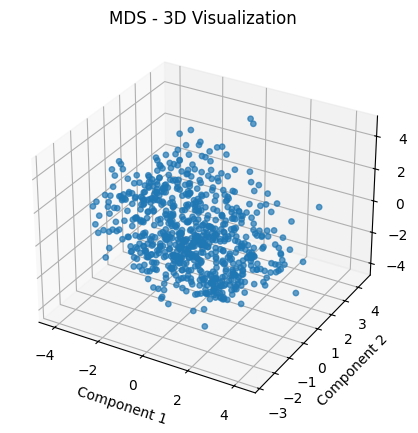

<ipython-input-13-69d6da016b09>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=labels, cmap='tab10', s=15, alpha=0.7)


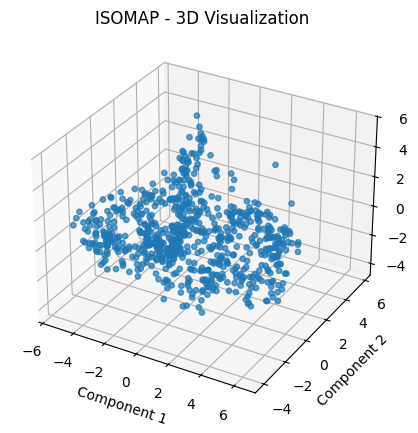

<ipython-input-13-69d6da016b09>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=labels, cmap='tab10', s=15, alpha=0.7)


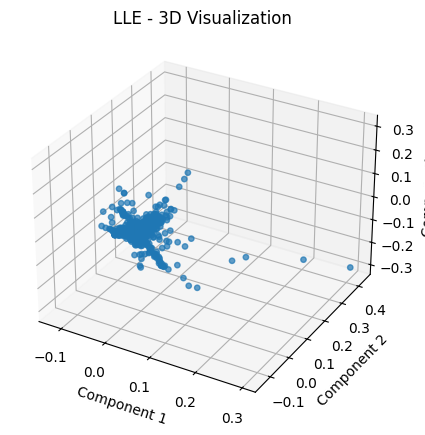

<ipython-input-13-69d6da016b09>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=labels, cmap='tab10', s=15, alpha=0.7)


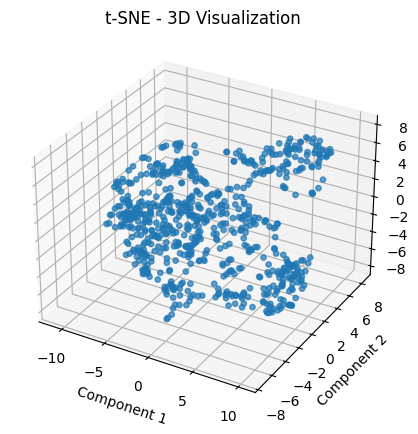

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-13-69d6da016b09>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=labels, cmap='tab10', s=15, alpha=0.7)


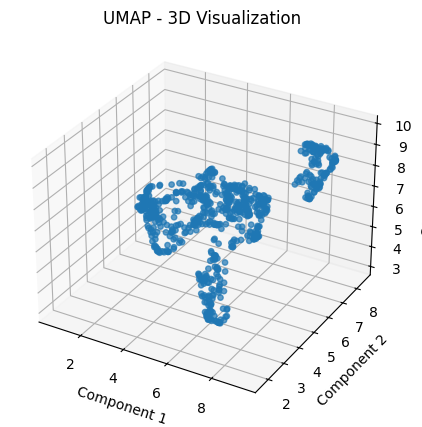

In [ ]:

methods_3d = {
    "MDS": MDS(n_components=3, random_state=42),
    "ISOMAP": Isomap(n_components=3),
    "LLE": LocallyLinearEmbedding(n_components=3, random_state=42, method='standard'),
    "t-SNE": TSNE(n_components=3, random_state=42),
    "UMAP": UMAP(n_components=3, random_state=42)
}

for name, method in methods_3d.items():
    embedding = method.fit_transform(X_scaled)
    visualize_3D(embedding, title=f"{name} - 3D Visualization")

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def evaluate_method(embeddings, labels=None, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, cluster_labels)
    return score

scores_2d = {}
for name, method in methods.items():
    embedding = method.fit_transform(X_scaled)
    score = evaluate_method(embedding, n_clusters=3)
    scores_2d[name] = score

print("Silhouette Scores for 2D embeddings:")
for method, score in scores_2d.items():
    print(f"{method}: {score:.4f}")

scores_3d = {}
for name, method in methods_3d.items():
    embedding = method.fit_transform(X_scaled)
    score = evaluate_method(embedding, n_clusters=3)
    scores_3d[name] = score

print("\nSilhouette Scores for 3D embeddings:")
for method, score in scores_3d.items():
    print(f"{method}: {score:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Silhouette Scores for 2D embeddings:
MDS: 0.3802
ISOMAP: 0.5118
LLE: 0.5063
t-SNE: 0.3594
UMAP: 0.4919


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Silhouette Scores for 3D embeddings:
MDS: 0.2804
ISOMAP: 0.3991
LLE: 0.3422
t-SNE: 0.3163
UMAP: 0.5393


### Оценка методов снижения размерности с помощью коэффициента силуэта (Silhouette Score)

Этот фрагмент кода предназначен для оценки качества методов снижения размерности (таких как MDS, t-SNE, UMAP и т. д.), примененных ранее в ноутбуке. Он использует метрику, называемую коэффициентом силуэта (Silhouette Score), чтобы оценить, насколько хорошо точки данных сгруппированы после снижения размерности.

- silhouette_score: Эта функция используется для расчета коэффициента силуэта, метрики для оценки качества кластеризации.
- KMeans: Это алгоритм кластеризации, используемый для группировки точек данных в кластеры.

- evaluate_method: Эта функция принимает данные с уменьшенной размерностью (embeddings), применяет к ним кластеризацию - K-Means и затем вычисляет коэффициент силуэта для полученных кластеров.
kmeans: Создается экземпляр алгоритма KMeans, указывающий желаемое количество кластеров (n_clusters, по умолчанию 3) и random_state для воспроизводимости.
- cluster_labels: KMeans применяется к embeddings, чтобы назначить каждую точку данных кластеру, и назначения кластеров сохраняются в cluster_labels.
- score: Коэффициент силуэта рассчитывается с помощью функции silhouette_score, сравнивая назначения кластеров (cluster_labels) с точками данных в пространстве с уменьшенной размерностью (embeddings).
- return score: Функция возвращает рассчитанный коэффициент силуэта.



#Результаты кластеризации К-средних и их визуализация

## Кластеризация решений 2D и 3D вложений алгоритмом К-средних, используя разное количество кластеров (от 3 до 6)


=== K-means for MDS - 2D ===


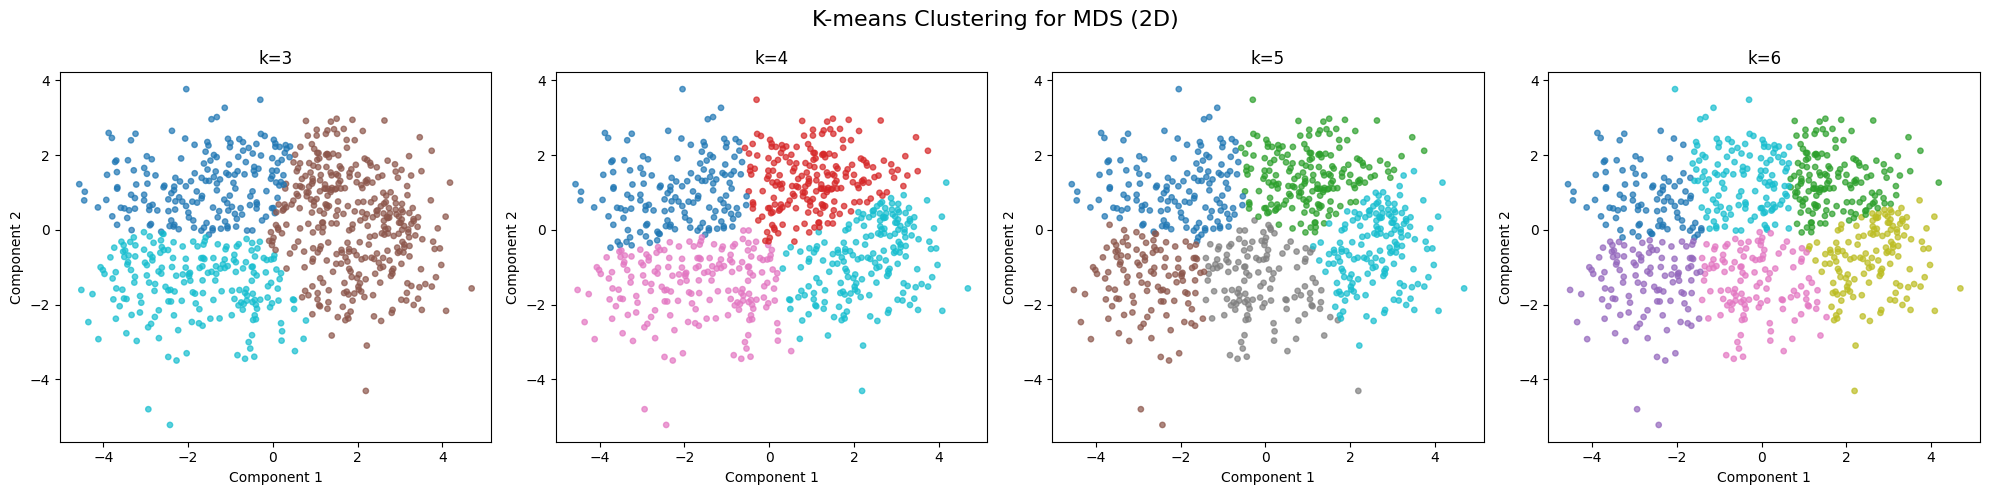


=== Cluster analysis with k=3 ===
Cluster 0: Total 184 element(s), Class Ratios: {0.344167: 0.005434782608695652, 0.363478: 0.005434782608695652, 0.169091: 0.005434782608695652, 0.216667: 0.005434782608695652, 0.292174: 0.005434782608695652, 0.2175: 0.005434782608695652, 0.195: 0.005434782608695652, 0.203478: 0.005434782608695652, 0.196522: 0.005434782608695652, 0.216522: 0.005434782608695652, 0.192174: 0.005434782608695652, 0.26: 0.005434782608695652, 0.233333: 0.005434782608695652, 0.271667: 0.005434782608695652, 0.295652: 0.005434782608695652, 0.364348: 0.005434782608695652, 0.343478: 0.005434782608695652, 0.407273: 0.005434782608695652, 0.384167: 0.016304347826086956, 0.376522: 0.005434782608695652, 0.295833: 0.005434782608695652, 0.317391: 0.005434782608695652, 0.365217: 0.005434782608695652, 0.415: 0.005434782608695652, 0.430435: 0.005434782608695652, 0.441667: 0.005434782608695652, 0.346957: 0.005434782608695652, 0.285: 0.005434782608695652, 0.3: 0.010869565217391304, 0.268333:

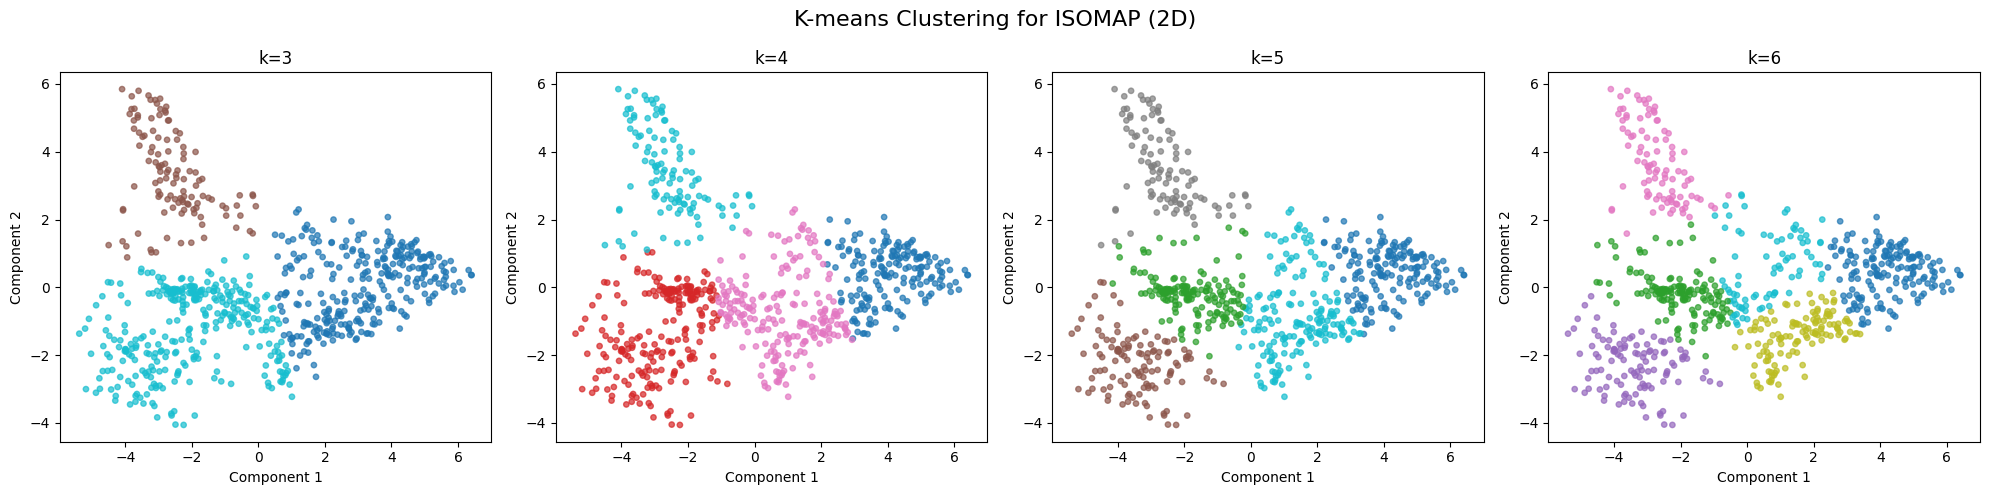


=== Cluster analysis with k=3 ===
Cluster 0: Total 298 element(s), Class Ratios: {0.344167: 0.003355704697986577, 0.363478: 0.003355704697986577, 0.196364: 0.003355704697986577, 0.2: 0.003355704697986577, 0.226957: 0.003355704697986577, 0.204348: 0.003355704697986577, 0.196522: 0.006711409395973154, 0.165: 0.006711409395973154, 0.138333: 0.003355704697986577, 0.150833: 0.003355704697986577, 0.169091: 0.003355704697986577, 0.172727: 0.003355704697986577, 0.16087: 0.003355704697986577, 0.233333: 0.006711409395973154, 0.231667: 0.003355704697986577, 0.175833: 0.003355704697986577, 0.216667: 0.003355704697986577, 0.292174: 0.003355704697986577, 0.261667: 0.006711409395973154, 0.1775: 0.003355704697986577, 0.0591304: 0.003355704697986577, 0.0965217: 0.003355704697986577, 0.0973913: 0.003355704697986577, 0.223478: 0.003355704697986577, 0.2175: 0.006711409395973154, 0.195: 0.003355704697986577, 0.203478: 0.003355704697986577, 0.216522: 0.003355704697986577, 0.180833: 0.003355704697986577, 0.

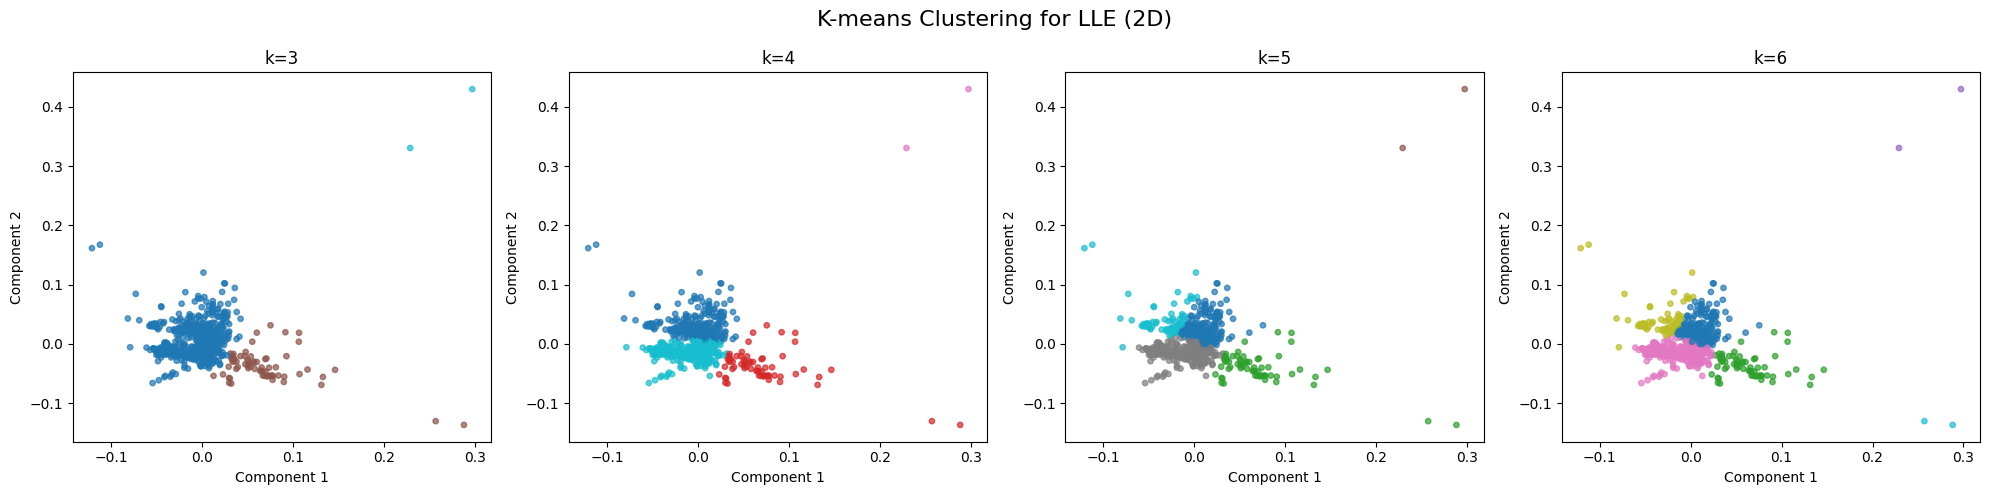


=== Cluster analysis with k=3 ===
Cluster 0: Total 661 element(s), Class Ratios: {0.344167: 0.0015128593040847202, 0.363478: 0.0015128593040847202, 0.196364: 0.0015128593040847202, 0.2: 0.0015128593040847202, 0.226957: 0.0015128593040847202, 0.204348: 0.0015128593040847202, 0.196522: 0.0030257186081694403, 0.165: 0.0030257186081694403, 0.138333: 0.0015128593040847202, 0.150833: 0.0015128593040847202, 0.169091: 0.0015128593040847202, 0.172727: 0.0015128593040847202, 0.16087: 0.0015128593040847202, 0.233333: 0.0015128593040847202, 0.231667: 0.0015128593040847202, 0.175833: 0.0015128593040847202, 0.292174: 0.0015128593040847202, 0.261667: 0.0030257186081694403, 0.1775: 0.0015128593040847202, 0.0591304: 0.0015128593040847202, 0.0965217: 0.0015128593040847202, 0.0973913: 0.0015128593040847202, 0.223478: 0.0015128593040847202, 0.195: 0.0015128593040847202, 0.203478: 0.0015128593040847202, 0.216522: 0.0015128593040847202, 0.180833: 0.0015128593040847202, 0.192174: 0.0015128593040847202, 0.26

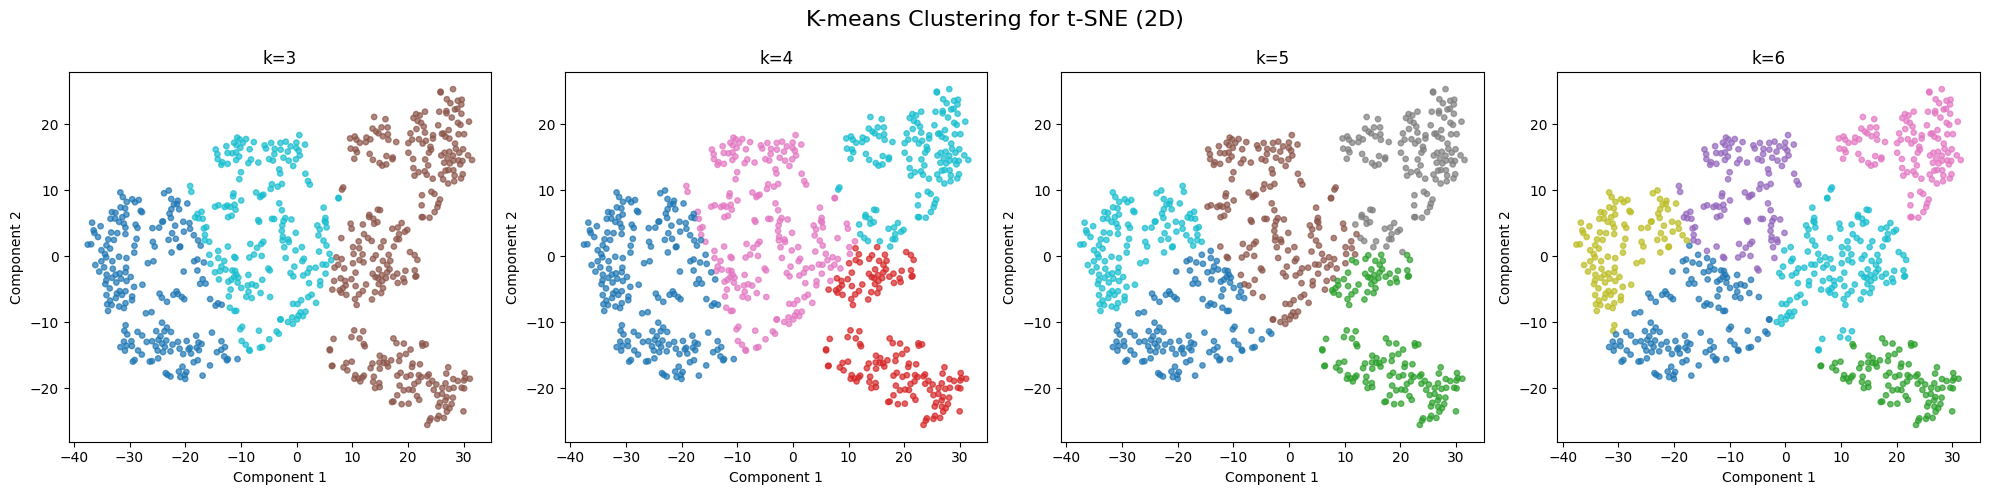


=== Cluster analysis with k=3 ===
Cluster 0: Total 203 element(s), Class Ratios: {0.344167: 0.0049261083743842365, 0.363478: 0.0049261083743842365, 0.196364: 0.0049261083743842365, 0.2: 0.0049261083743842365, 0.226957: 0.0049261083743842365, 0.204348: 0.0049261083743842365, 0.196522: 0.009852216748768473, 0.165: 0.009852216748768473, 0.138333: 0.0049261083743842365, 0.150833: 0.0049261083743842365, 0.169091: 0.0049261083743842365, 0.172727: 0.0049261083743842365, 0.16087: 0.0049261083743842365, 0.233333: 0.009852216748768473, 0.231667: 0.0049261083743842365, 0.175833: 0.0049261083743842365, 0.216667: 0.0049261083743842365, 0.292174: 0.0049261083743842365, 0.261667: 0.009852216748768473, 0.1775: 0.0049261083743842365, 0.0591304: 0.0049261083743842365, 0.0965217: 0.0049261083743842365, 0.0973913: 0.0049261083743842365, 0.223478: 0.0049261083743842365, 0.2175: 0.009852216748768473, 0.195: 0.0049261083743842365, 0.203478: 0.0049261083743842365, 0.216522: 0.0049261083743842365, 0.180833: 0

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


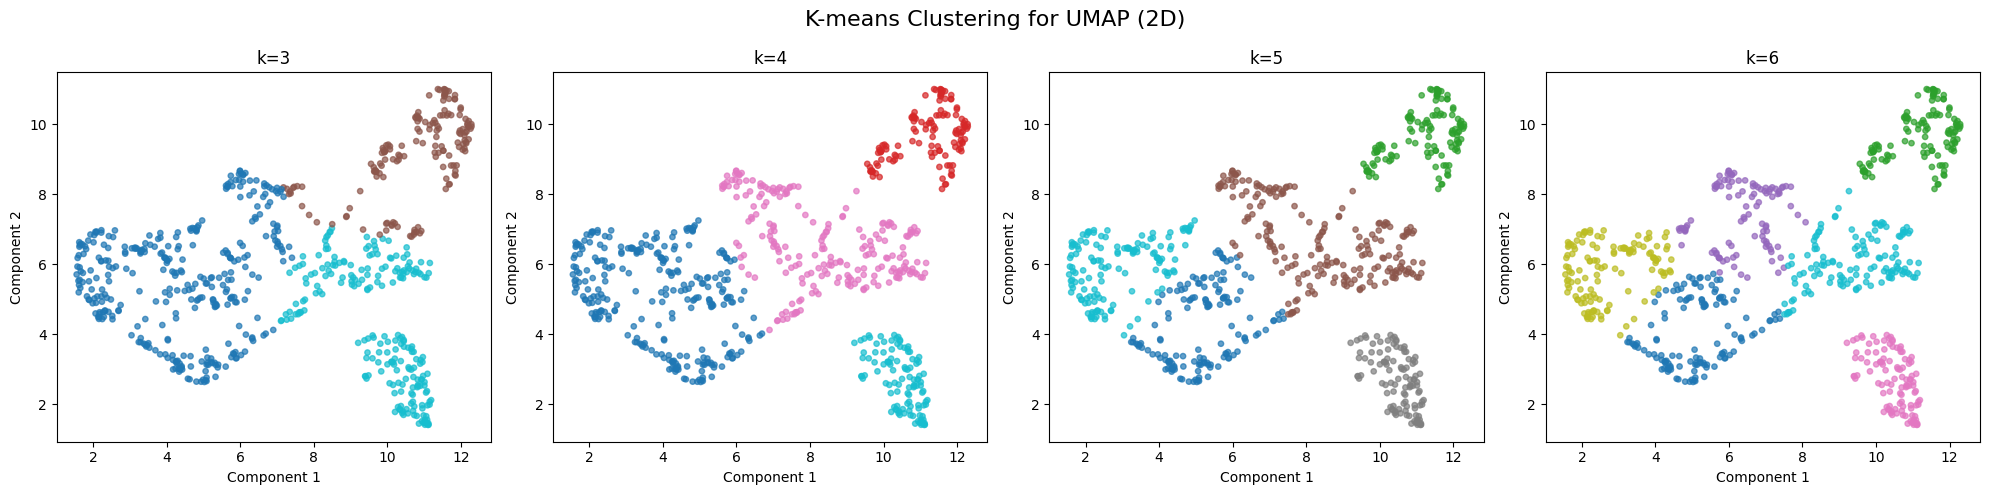


=== Cluster analysis with k=3 ===
Cluster 0: Total 347 element(s), Class Ratios: {0.344167: 0.002881844380403458, 0.363478: 0.002881844380403458, 0.196364: 0.002881844380403458, 0.2: 0.002881844380403458, 0.226957: 0.002881844380403458, 0.204348: 0.002881844380403458, 0.196522: 0.005763688760806916, 0.165: 0.005763688760806916, 0.138333: 0.002881844380403458, 0.150833: 0.002881844380403458, 0.169091: 0.002881844380403458, 0.172727: 0.002881844380403458, 0.16087: 0.002881844380403458, 0.233333: 0.005763688760806916, 0.231667: 0.002881844380403458, 0.175833: 0.002881844380403458, 0.216667: 0.002881844380403458, 0.292174: 0.002881844380403458, 0.261667: 0.005763688760806916, 0.1775: 0.002881844380403458, 0.0591304: 0.002881844380403458, 0.0965217: 0.002881844380403458, 0.0973913: 0.002881844380403458, 0.223478: 0.002881844380403458, 0.2175: 0.005763688760806916, 0.195: 0.002881844380403458, 0.203478: 0.002881844380403458, 0.216522: 0.002881844380403458, 0.180833: 0.002881844380403458, 0.

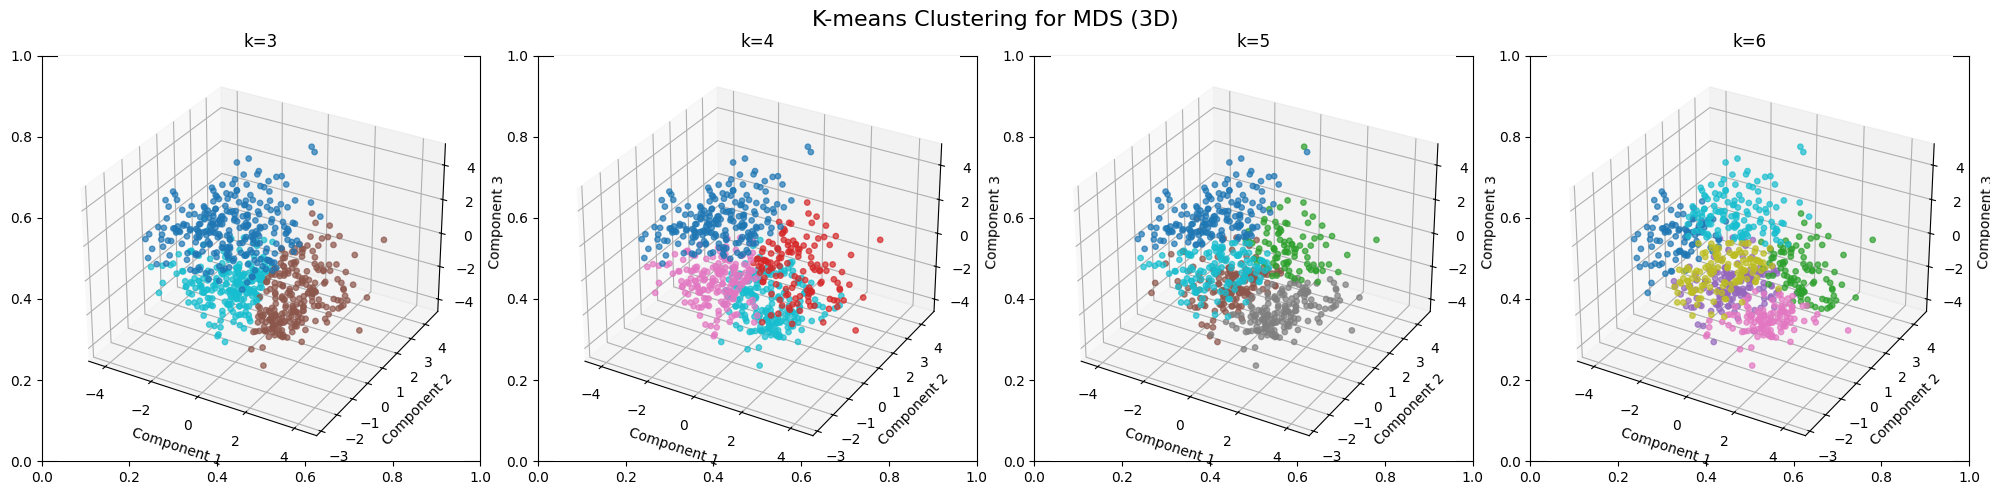


=== Cluster analysis with k=3 ===
Cluster 0: Total 267 element(s), Class Ratios: {0.344167: 0.003745318352059925, 0.363478: 0.003745318352059925, 0.196364: 0.003745318352059925, 0.2: 0.003745318352059925, 0.226957: 0.003745318352059925, 0.204348: 0.003745318352059925, 0.196522: 0.00749063670411985, 0.165: 0.00749063670411985, 0.138333: 0.003745318352059925, 0.150833: 0.003745318352059925, 0.169091: 0.003745318352059925, 0.172727: 0.003745318352059925, 0.16087: 0.003745318352059925, 0.233333: 0.00749063670411985, 0.231667: 0.003745318352059925, 0.175833: 0.003745318352059925, 0.216667: 0.003745318352059925, 0.292174: 0.003745318352059925, 0.261667: 0.00749063670411985, 0.1775: 0.003745318352059925, 0.0591304: 0.003745318352059925, 0.0965217: 0.003745318352059925, 0.0973913: 0.003745318352059925, 0.223478: 0.003745318352059925, 0.2175: 0.00749063670411985, 0.195: 0.003745318352059925, 0.203478: 0.003745318352059925, 0.216522: 0.003745318352059925, 0.180833: 0.003745318352059925, 0.19217

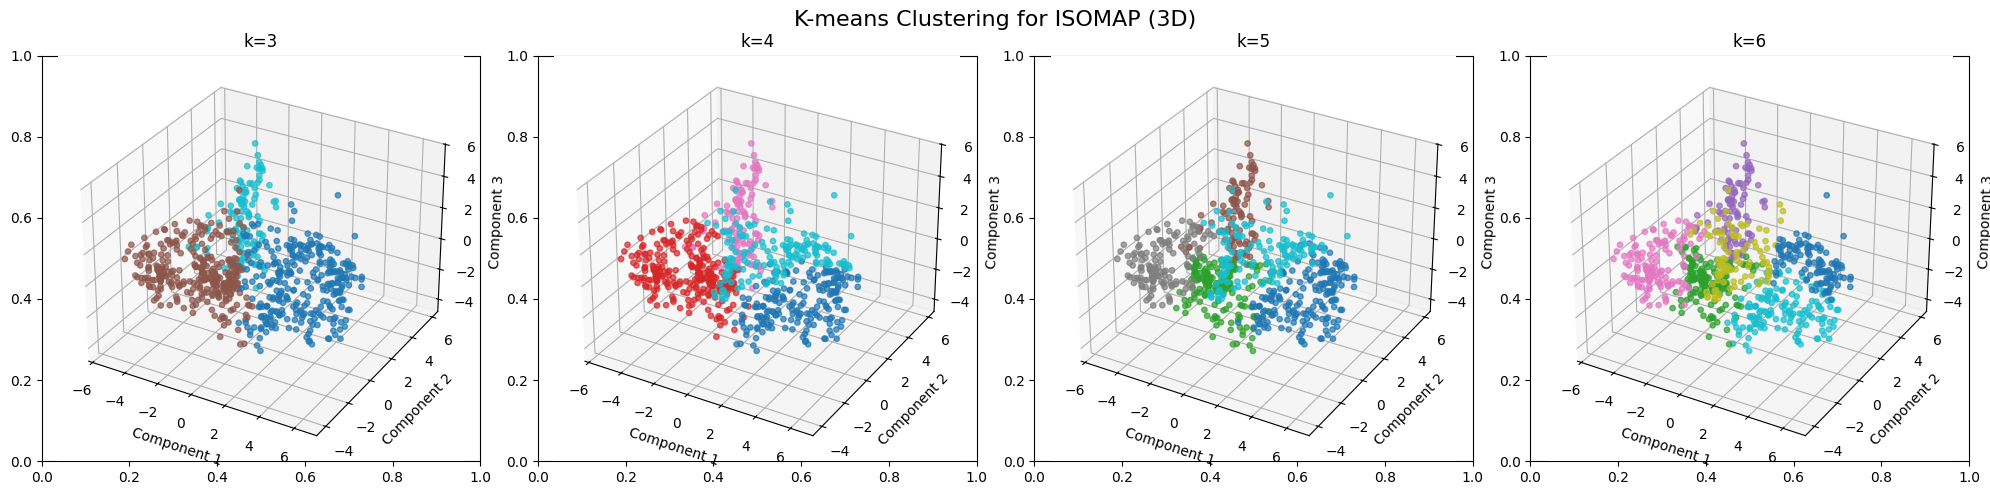


=== Cluster analysis with k=3 ===
Cluster 0: Total 298 element(s), Class Ratios: {0.344167: 0.003355704697986577, 0.363478: 0.003355704697986577, 0.196364: 0.003355704697986577, 0.2: 0.003355704697986577, 0.226957: 0.003355704697986577, 0.204348: 0.003355704697986577, 0.196522: 0.006711409395973154, 0.165: 0.006711409395973154, 0.138333: 0.003355704697986577, 0.150833: 0.003355704697986577, 0.169091: 0.003355704697986577, 0.172727: 0.003355704697986577, 0.16087: 0.003355704697986577, 0.233333: 0.006711409395973154, 0.231667: 0.003355704697986577, 0.175833: 0.003355704697986577, 0.216667: 0.003355704697986577, 0.292174: 0.003355704697986577, 0.261667: 0.006711409395973154, 0.1775: 0.003355704697986577, 0.0591304: 0.003355704697986577, 0.0965217: 0.003355704697986577, 0.0973913: 0.003355704697986577, 0.223478: 0.003355704697986577, 0.2175: 0.006711409395973154, 0.195: 0.003355704697986577, 0.203478: 0.003355704697986577, 0.216522: 0.003355704697986577, 0.180833: 0.003355704697986577, 0.

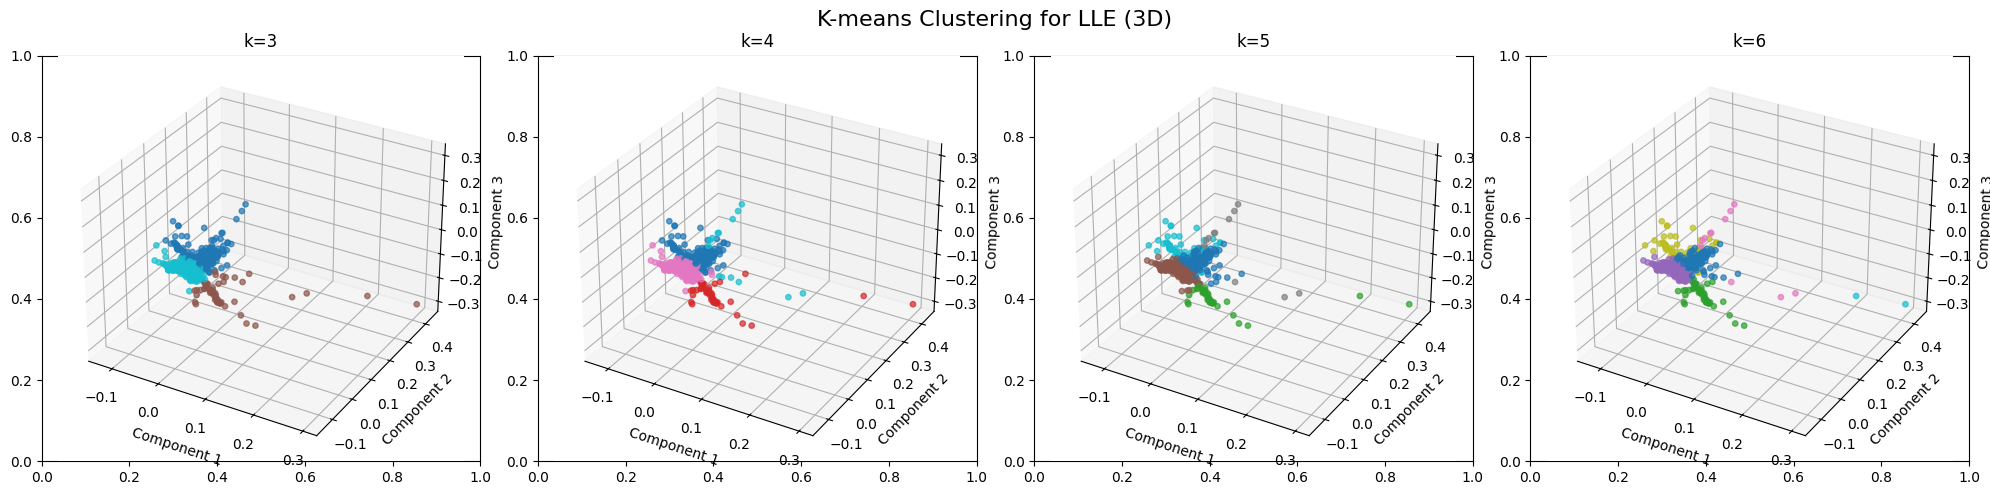


=== Cluster analysis with k=3 ===
Cluster 0: Total 284 element(s), Class Ratios: {0.344167: 0.0035211267605633804, 0.363478: 0.0035211267605633804, 0.196364: 0.0035211267605633804, 0.2: 0.0035211267605633804, 0.226957: 0.0035211267605633804, 0.204348: 0.0035211267605633804, 0.196522: 0.007042253521126761, 0.165: 0.007042253521126761, 0.138333: 0.0035211267605633804, 0.150833: 0.0035211267605633804, 0.169091: 0.0035211267605633804, 0.172727: 0.0035211267605633804, 0.16087: 0.0035211267605633804, 0.233333: 0.007042253521126761, 0.231667: 0.0035211267605633804, 0.175833: 0.0035211267605633804, 0.216667: 0.0035211267605633804, 0.292174: 0.0035211267605633804, 0.261667: 0.007042253521126761, 0.1775: 0.0035211267605633804, 0.0591304: 0.0035211267605633804, 0.0965217: 0.0035211267605633804, 0.0973913: 0.0035211267605633804, 0.223478: 0.0035211267605633804, 0.2175: 0.007042253521126761, 0.195: 0.0035211267605633804, 0.203478: 0.0035211267605633804, 0.216522: 0.0035211267605633804, 0.180833: 0

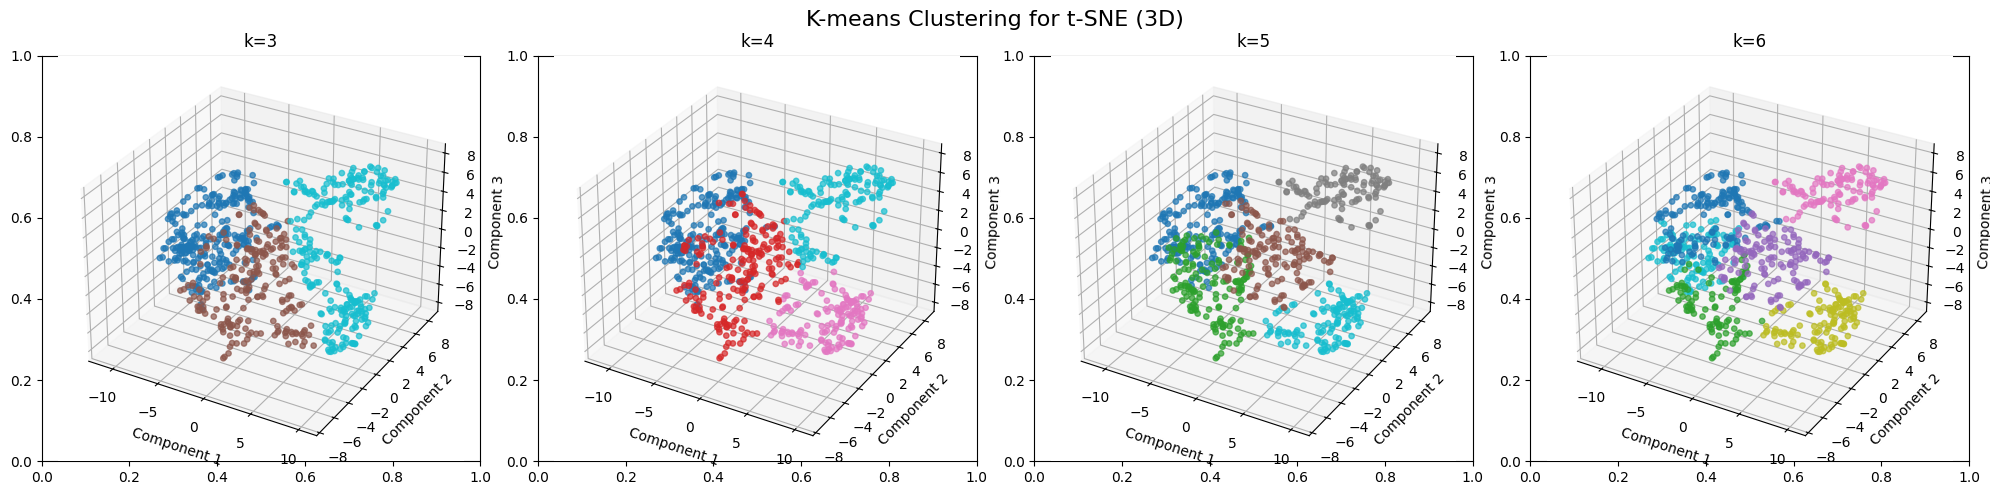


=== Cluster analysis with k=3 ===
Cluster 0: Total 268 element(s), Class Ratios: {0.344167: 0.0037313432835820895, 0.363478: 0.0037313432835820895, 0.196364: 0.0037313432835820895, 0.2: 0.0037313432835820895, 0.226957: 0.0037313432835820895, 0.204348: 0.0037313432835820895, 0.196522: 0.007462686567164179, 0.165: 0.007462686567164179, 0.138333: 0.0037313432835820895, 0.150833: 0.0037313432835820895, 0.169091: 0.0037313432835820895, 0.172727: 0.0037313432835820895, 0.16087: 0.0037313432835820895, 0.233333: 0.007462686567164179, 0.231667: 0.0037313432835820895, 0.175833: 0.0037313432835820895, 0.216667: 0.0037313432835820895, 0.292174: 0.0037313432835820895, 0.261667: 0.007462686567164179, 0.1775: 0.0037313432835820895, 0.0591304: 0.0037313432835820895, 0.0965217: 0.0037313432835820895, 0.0973913: 0.0037313432835820895, 0.223478: 0.0037313432835820895, 0.2175: 0.007462686567164179, 0.195: 0.0037313432835820895, 0.203478: 0.0037313432835820895, 0.216522: 0.0037313432835820895, 0.180833: 0

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


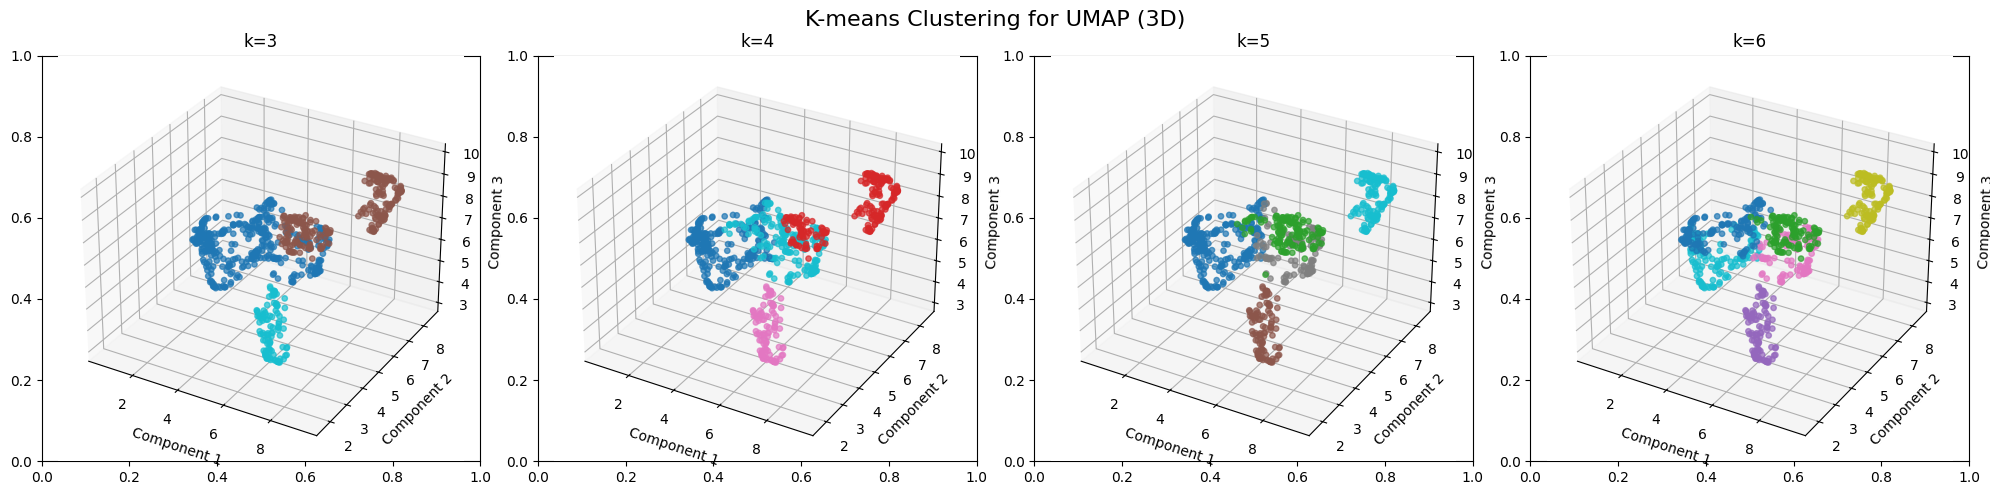


=== Cluster analysis with k=3 ===
Cluster 0: Total 387 element(s), Class Ratios: {0.344167: 0.002583979328165375, 0.363478: 0.002583979328165375, 0.196364: 0.002583979328165375, 0.2: 0.002583979328165375, 0.226957: 0.002583979328165375, 0.204348: 0.002583979328165375, 0.196522: 0.00516795865633075, 0.165: 0.00516795865633075, 0.138333: 0.002583979328165375, 0.150833: 0.002583979328165375, 0.169091: 0.002583979328165375, 0.172727: 0.002583979328165375, 0.16087: 0.002583979328165375, 0.233333: 0.00516795865633075, 0.231667: 0.002583979328165375, 0.175833: 0.002583979328165375, 0.216667: 0.002583979328165375, 0.292174: 0.002583979328165375, 0.261667: 0.00516795865633075, 0.1775: 0.002583979328165375, 0.0591304: 0.002583979328165375, 0.0965217: 0.002583979328165375, 0.0973913: 0.002583979328165375, 0.223478: 0.002583979328165375, 0.2175: 0.00516795865633075, 0.195: 0.002583979328165375, 0.203478: 0.002583979328165375, 0.216522: 0.002583979328165375, 0.180833: 0.002583979328165375, 0.19217

In [ ]:
from sklearn.cluster import KMeans
from collections import Counter

def kmeans_clustering_and_visualize(embedding, labels=None, n_clusters_range=(3, 7), is_3D=False, method_name="Method"):
    fig, axes = plt.subplots(1, n_clusters_range[1] - n_clusters_range[0], figsize=(20, 5))

    cluster_analysis_results = []

    for idx, n_clusters in enumerate(range(n_clusters_range[0], n_clusters_range[1])):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(embedding)

        if labels is not None:
            cluster_analysis = []
            for cluster_id in range(n_clusters):
                cluster_indices = (clusters == cluster_id)
                cluster_labels = labels[cluster_indices]
                label_counts = Counter(cluster_labels)
                total_count = sum(label_counts.values())
                cluster_analysis.append({
                    "Cluster": cluster_id,
                    "Total": total_count,
                    "Class Ratios": {k: v / total_count for k, v in label_counts.items()}
                })
            cluster_analysis_results.append((n_clusters, cluster_analysis))

        if not is_3D:
            scatter = axes[idx].scatter(embedding[:, 0], embedding[:, 1], c=clusters, cmap='tab10', s=15, alpha=0.7)
            axes[idx].set_title(f"k={n_clusters}")
            axes[idx].set_xlabel("Component 1")
            axes[idx].set_ylabel("Component 2")
        else:
            from mpl_toolkits.mplot3d import Axes3D
            ax = fig.add_subplot(1, n_clusters_range[1] - n_clusters_range[0], idx + 1, projection='3d')
            scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=clusters, cmap='tab10', s=15, alpha=0.7)
            ax.set_title(f"k={n_clusters}")
            ax.set_xlabel("Component 1")
            ax.set_ylabel("Component 2")
            ax.set_zlabel("Component 3")

    plt.suptitle(f"K-means Clustering for {method_name} ({'3D' if is_3D else '2D'})", fontsize=16)
    plt.tight_layout()
    plt.show()

    if labels is not None:
        for n_clusters, analysis in cluster_analysis_results:
            print(f"\n=== Cluster analysis with k={n_clusters} ===")
            for cluster in analysis:
                print(f"Cluster {cluster['Cluster']}: Total {cluster['Total']} element(s), Class Ratios: {cluster['Class Ratios']}")
labels = X['temp'].values
for name, method in methods.items():
    print(f"\n=== K-means for {name} - 2D ===")
    embedding_2D = method.fit_transform(X_scaled)
    kmeans_clustering_and_visualize(embedding_2D, labels=labels, n_clusters_range=(3, 7), method_name=name)

for name, method in methods_3d.items():
    print(f"\n=== K-means for {name} - 3D ===")
    embedding_3D = method.fit_transform(X_scaled)
    kmeans_clustering_and_visualize(embedding_3D, labels=labels, n_clusters_range=(3, 7), is_3D=True, method_name=name)


**Kластеризация и визуализация**

- Цикл по количеству кластеров: Код перебирает диапазон количества кластеров (от n_clusters_range[0] до n_clusters_range[1]), выполняя кластеризацию K-средних для каждого значения 'k'.
- Инициализация KMeans: Для каждого 'k' он создает объект KMeans, указывая количество кластеров и random_state для воспроизводимости.
- Кластеризация: Метод fit_predict используется для применения K-средних к данным embedding и получения назначений кластеров для каждой точки данных.

**Анализ кластеров**

- Эта часть выполняется только в том случае, если вы предоставляете истинные метки (labels) для своих данных.
- Она анализирует состав каждого кластера, подсчитывая, сколько точек данных с каждой истинной меткой попадает в этот кластер.
- Результаты хранятся в cluster_analysis_results для последующей печати.

**Визуализация**

- Этот раздел создает либо 2D, либо 3D точечные диаграммы для визуализации кластеров.
- Аргумент c=clusters в scatter назначает цвета точкам на основе их принадлежности к кластерам.
- cmap='tab10' предоставляет цветовую схему.

**Вывод результатов анализа кластеров**
- Если были предоставлены истинные метки, эта часть печатает сводку анализа кластеров, показывая общее количество точек данных в каждом кластере и долю каждой истинной метки внутри кластера.

**Применение функции**
- Эта часть применяет функцию kmeans_clustering_and_visualize к данным после применения различных методов уменьшения размерности (methods и methods_3d).
- Она перебирает каждый метод, выполняет кластеризацию с различными значениями 'k' и визуализирует результаты.

#Результаты обучения моделей дерева решений и случайного леса и их визуализация

##обучение моделей деревьев решений и  случайного леса

MDS - Decision Tree:
               precision    recall  f1-score   support

           0       0.76      0.65      0.70        49
           1       0.90      0.77      0.83        47
           2       0.75      0.94      0.84        54

    accuracy                           0.79       150
   macro avg       0.80      0.79      0.79       150
weighted avg       0.80      0.79      0.79       150

MDS - Random Forest:
               precision    recall  f1-score   support

           0       0.85      0.69      0.76        49
           1       0.85      0.85      0.85        47
           2       0.81      0.94      0.87        54

    accuracy                           0.83       150
   macro avg       0.84      0.83      0.83       150
weighted avg       0.84      0.83      0.83       150

ISOMAP - Decision Tree:
               precision    recall  f1-score   support

           0       0.78      0.73      0.76        49
           1       0.82      0.79      0.80        47
      

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP - Decision Tree:
               precision    recall  f1-score   support

           0       0.68      0.55      0.61        49
           1       0.79      0.72      0.76        47
           2       0.75      0.93      0.83        54

    accuracy                           0.74       150
   macro avg       0.74      0.73      0.73       150
weighted avg       0.74      0.74      0.73       150

UMAP - Random Forest:
               precision    recall  f1-score   support

           0       0.66      0.71      0.69        49
           1       0.84      0.66      0.74        47
           2       0.80      0.89      0.84        54

    accuracy                           0.76       150
   macro avg       0.77      0.75      0.76       150
weighted avg       0.77      0.76      0.76       150



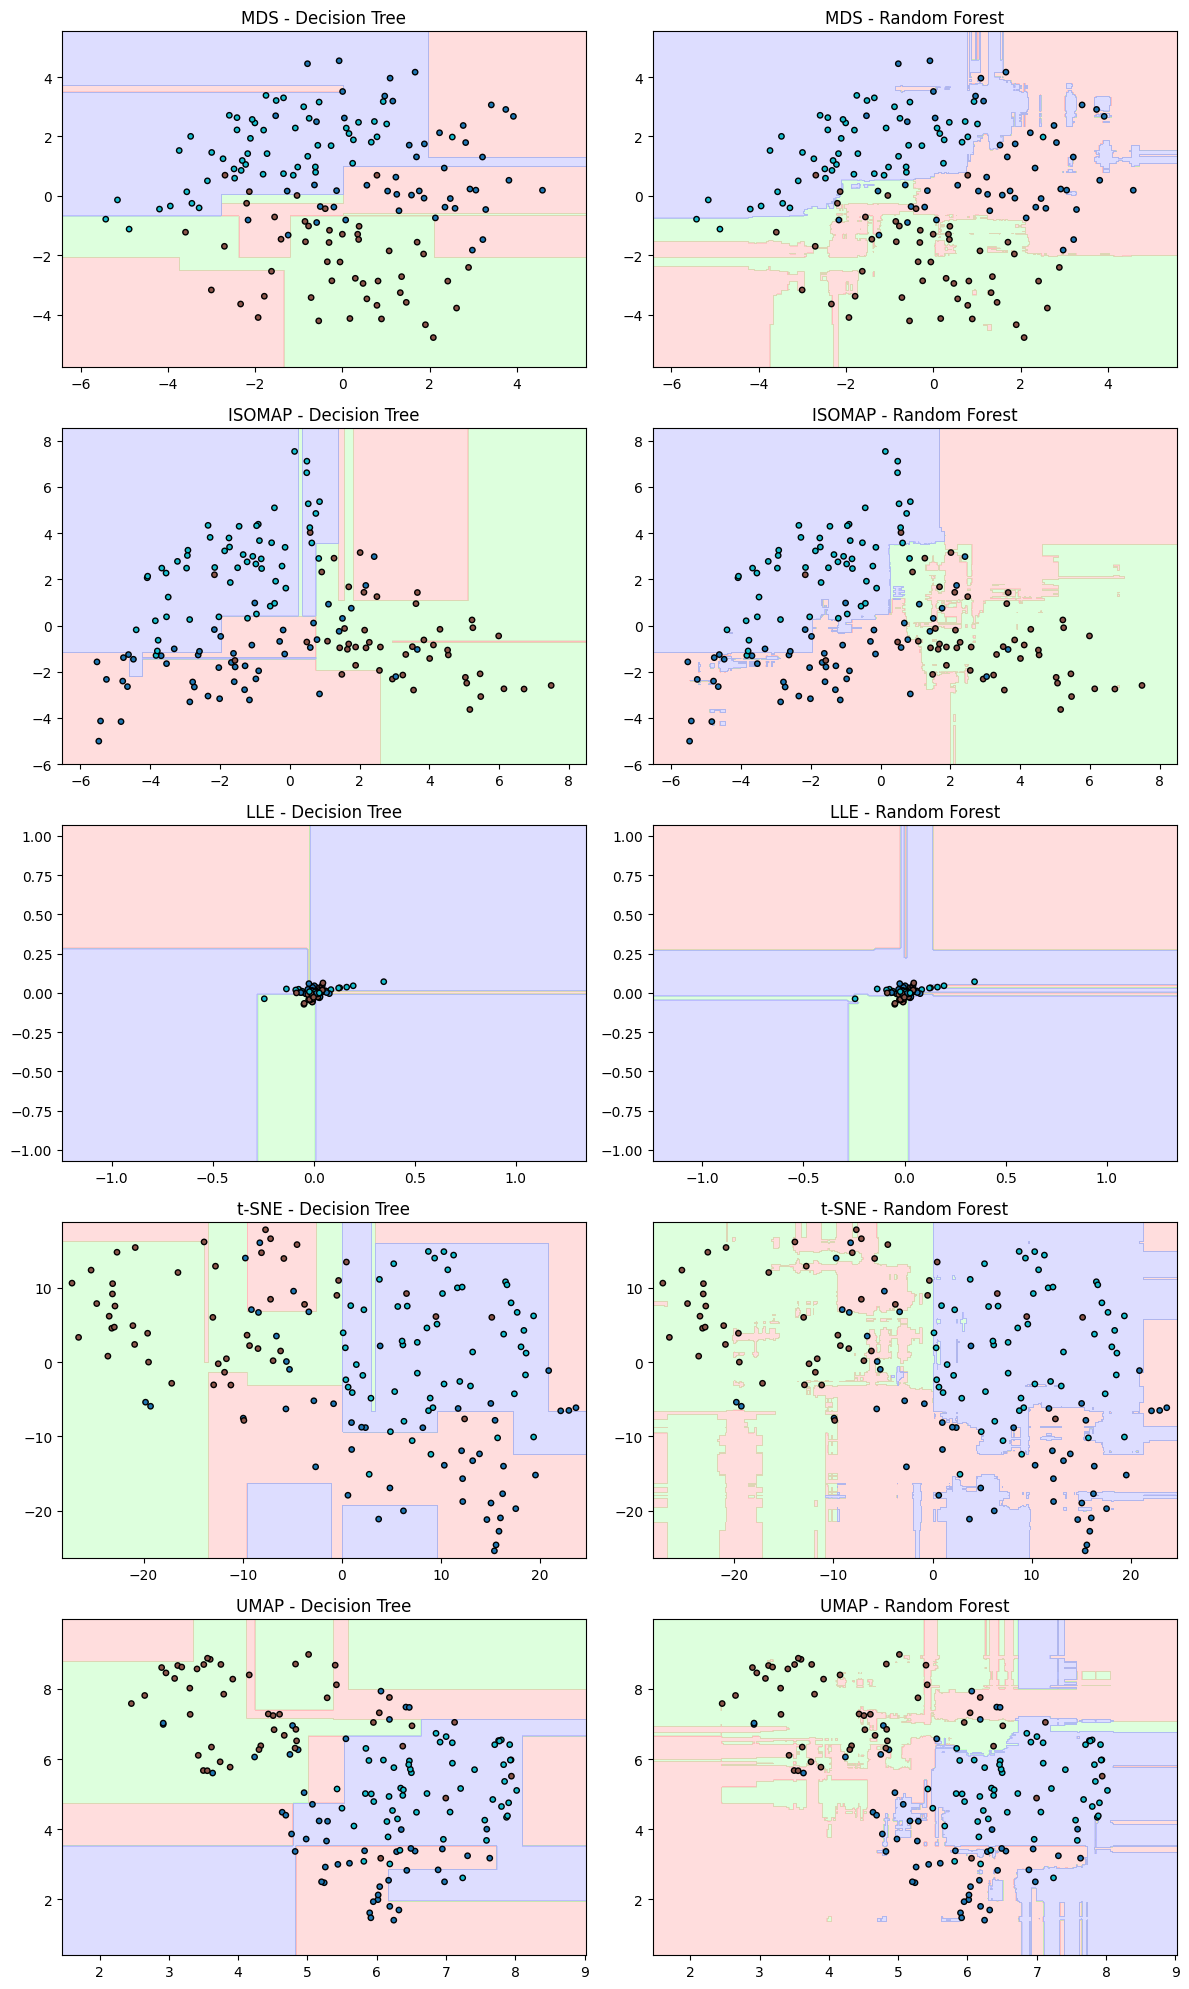

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', edgecolor='k', s=15)
    ax.set_title(title)

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, n_features=10, n_classes=3, n_clusters_per_class=1, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



fig, axes = plt.subplots(len(methods), 2, figsize=(12, 20))

for i, (name, method) in enumerate(methods.items()):
    embedding_2D = method.fit_transform(X_scaled)
    X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(embedding_2D, y, test_size=0.3, random_state=42)

    dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
    dt_clf.fit(X_train_2D, y_train_2D)
    y_pred_dt = dt_clf.predict(X_test_2D)
    print(f"{name} - Decision Tree:\n", classification_report(y_test_2D, y_pred_dt))

    rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)
    rf_clf.fit(X_train_2D, y_train_2D)
    y_pred_rf = rf_clf.predict(X_test_2D)
    y_pred_proba_rf= rf_clf.predict_proba(X_test_2D)
    print(f"{name} - Random Forest:\n", classification_report(y_test_2D, y_pred_rf))

    plot_decision_boundary(dt_clf, X_test_2D, y_test_2D, f"{name} - Decision Tree", axes[i, 0])
    plot_decision_boundary(rf_clf, X_test_2D, y_test_2D, f"{name} - Random Forest", axes[i, 1])

plt.tight_layout()
plt.show()


<ipython-input-26-2b7bc12cc5c5>:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, 1].boxplot(y_pred_proba_rf, labels=[f'Class {cls}' for cls in np.unique(y)], vert=True)
<ipython-input-26-2b7bc12cc5c5>:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, 1].boxplot(y_pred_proba_rf, labels=[f'Class {cls}' for cls in np.unique(y)], vert=True)
<ipython-input-26-2b7bc12cc5c5>:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, 1].boxplot(y_pred_proba_rf, labels=[f'Class {cls}' for cls in np.unique(y)], vert=True)
<ipython-input-26-2b7bc12cc5c5>:16: MatplotlibDeprecationWarning: The 'labels' parameter of

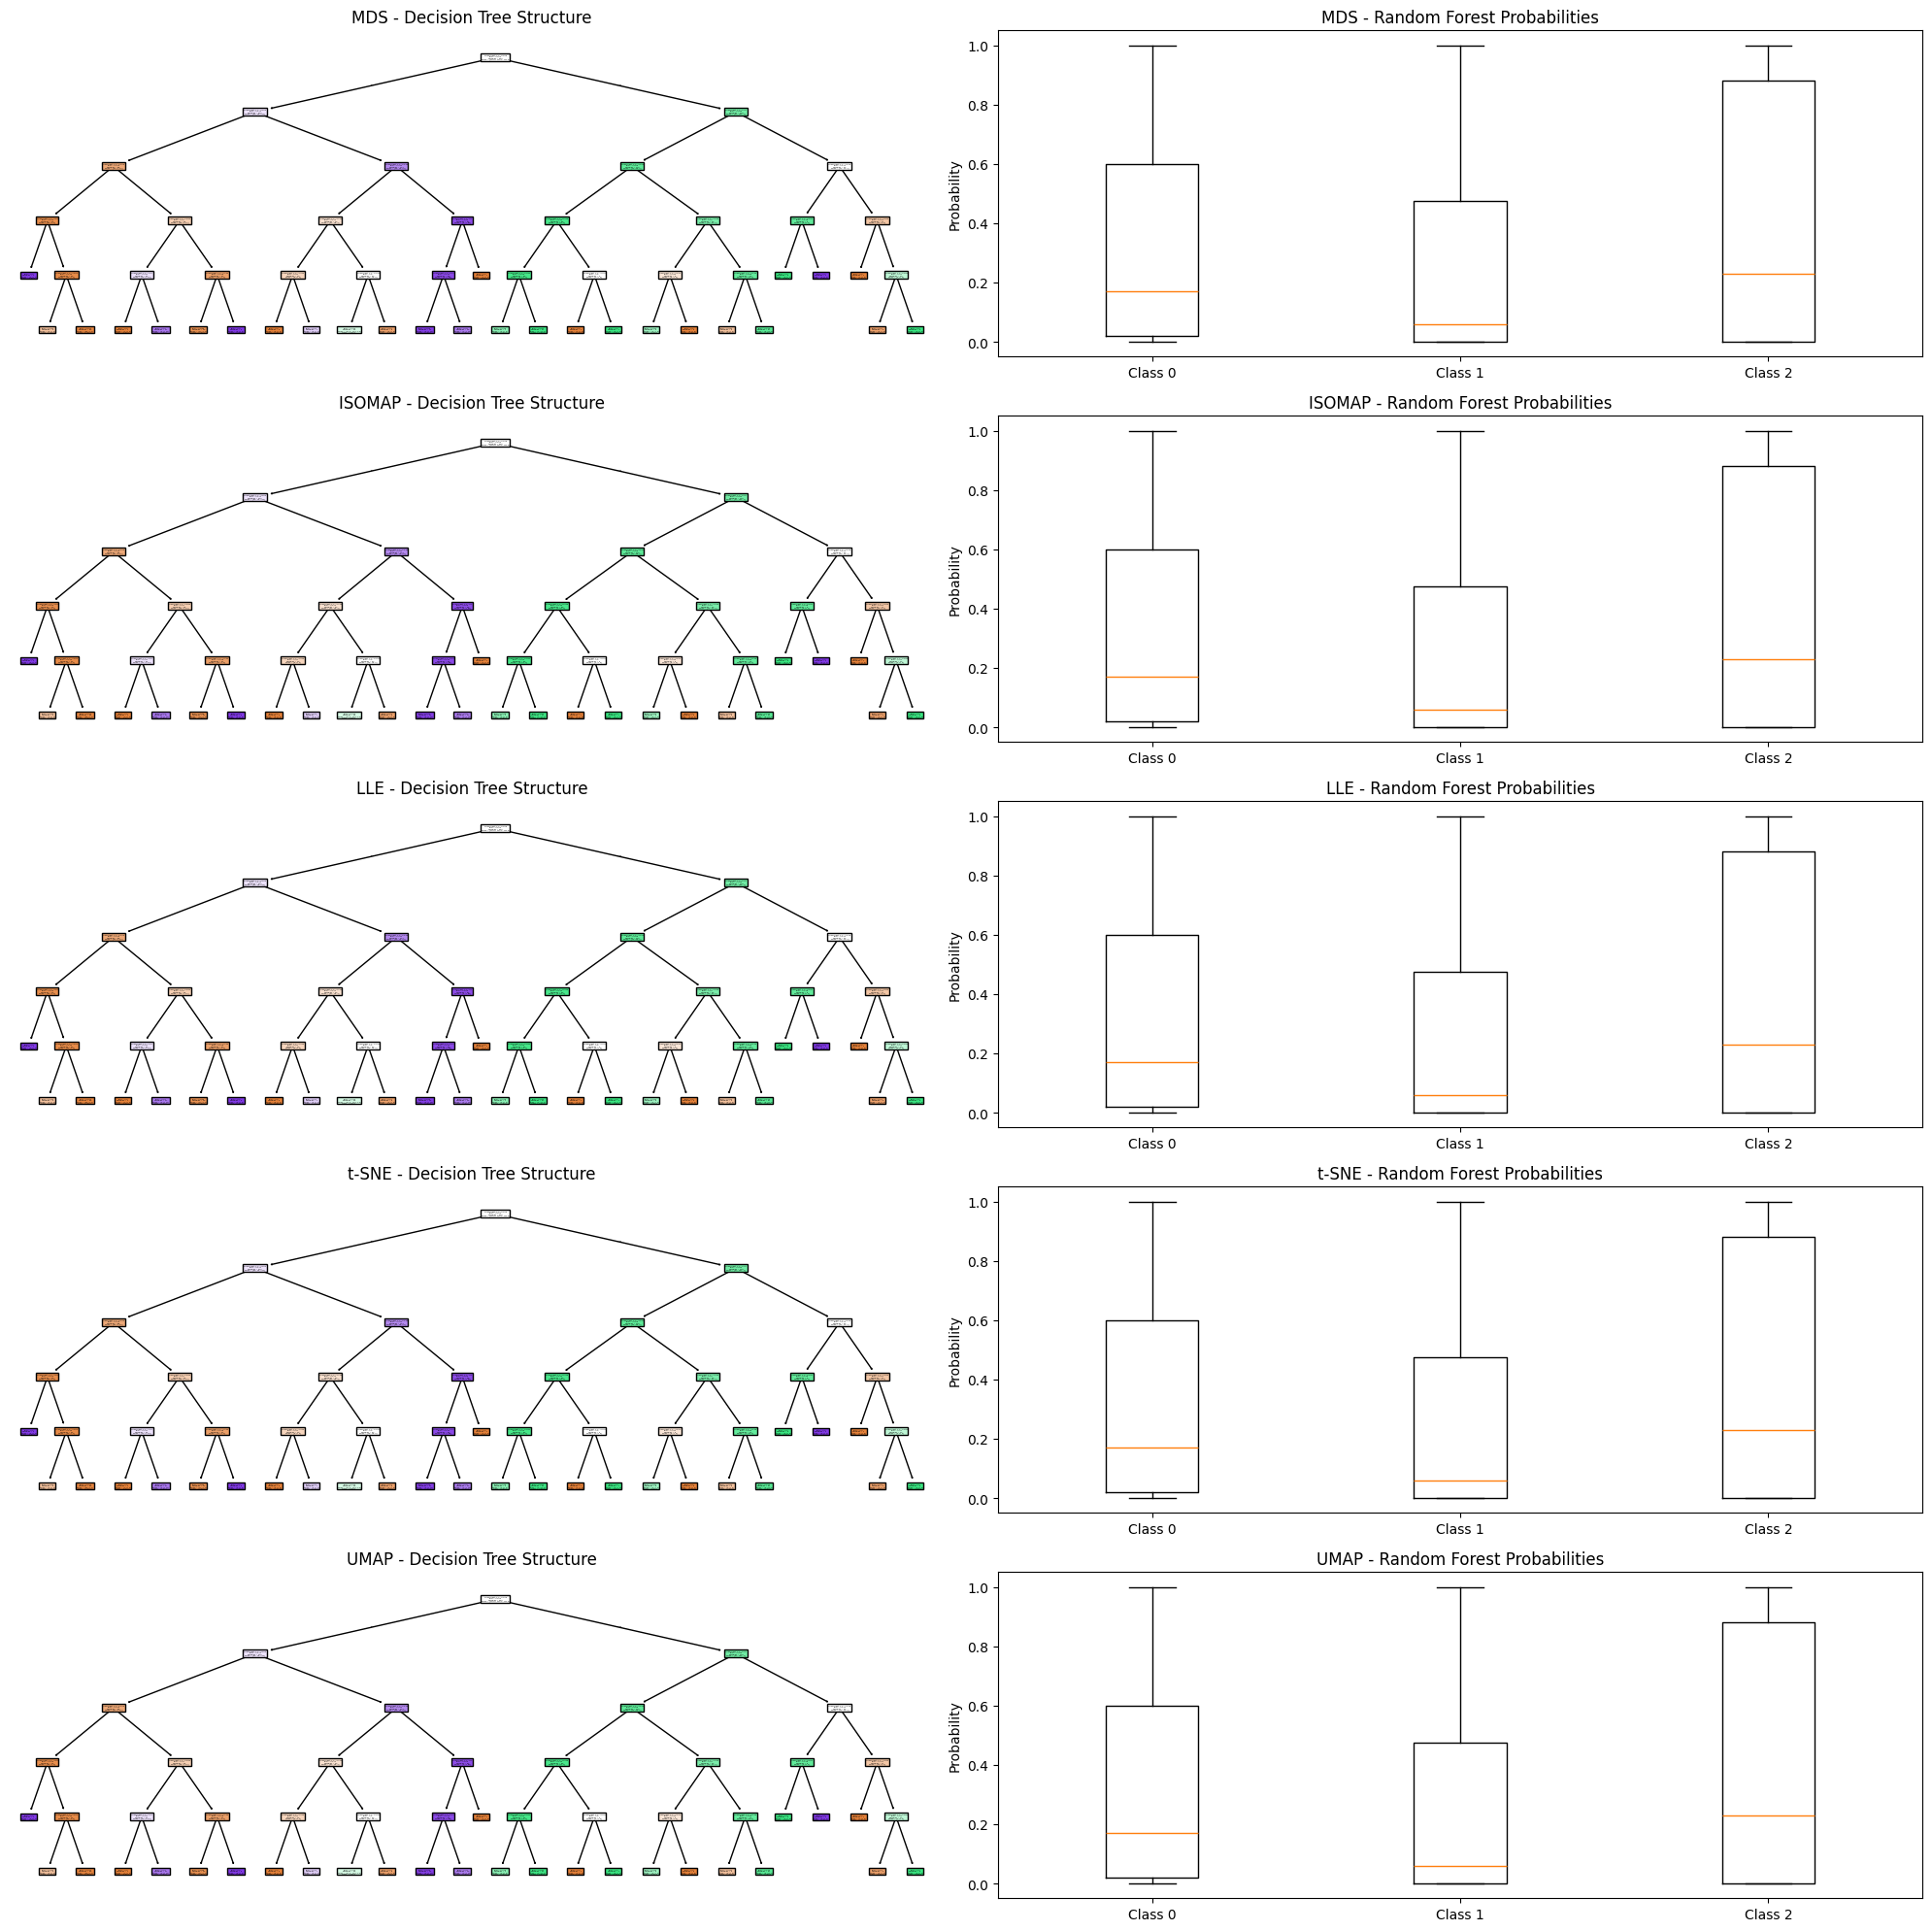

In [ ]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(len(methods), 2, figsize=(20, 20))

for i, (name, method) in enumerate(methods.items()):


    plot_tree(dt_clf, feature_names=['Component 1', 'Component 2'],
              class_names=[f'Class {cls}' for cls in np.unique(y)],
              filled=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"{name} - Decision Tree Structure")

    axes[i, 1].boxplot(y_pred_proba_rf, labels=[f'Class {cls}' for cls in np.unique(y)], vert=True)
    axes[i, 1].set_title(f"{name} - Random Forest Probabilities")
    axes[i, 1].set_ylabel("Probability")

plt.tight_layout()
plt.show()


- from sklearn.tree import plot_tree: Эта строка импортирует функцию plot_tree, которая используется для визуализации структуры дерева решений.

- fig, axes = plt.subplots(len(methods), 2, figsize=(20, 20)): Эта строка создает рисунок и сетку подграфиков с помощью библиотеки matplotlib.pyplot.
  - len(methods): Определяет количество строк в сетке, соответствующее количеству методов снижения размерности.
  - 2: Указывает два столбца в сетке: один для дерева решений и один для случайного леса.
  - figsize=(20, 20): Задает размер рисунка.

- for i, (name, method) in enumerate(methods.items()):: Этот цикл перебирает каждый метод снижения размерности в словаре methods.
  - enumerate: Предоставляет счетчик (i) вместе с парами ключ-значение (name, method) из словаря.

- plot_tree(...): Эта строка визуализирует дерево решений.
  - dt_clf: Представляет обученную модель дерева решений.
  - feature_names=['Component 1', 'Component 2']: Устанавливает метки для признаков, используемых в дереве.
  - class_names=[f'Class {cls}' for cls in np.unique(y)]: Создает метки для целевых классов на основе уникальных значений в y (целевая переменная).
  - filled=True: Раскрашивает узлы дерева в зависимости от класса, который они представляют.
  - ax=axes[i, 0]: Строит дерево на соответствующем подграфике в первом столбце.

- axes[i, 0].set_title(f"{name} - Decision Tree Structure"): Устанавливает заголовок подграфика для дерева решений. **(Перевод: axes[i, 0].set_title(f"{name} - Структура дерева решений"))

- axes[i, 1].boxplot(...): Эта строка создает блочную диаграмму для визуализации предсказанных вероятностей из случайного леса.
  - y_pred_proba_rf: Содержит предсказанные вероятности для каждого класса.
  - labels=[f'Class {cls}' for cls in np.unique(y)]: Устанавливает метки для классов на оси x.
  - vert=True: Создает вертикальную блочную диаграмму.
  - ax=axes[i, 1]: Строит блочную диаграмму на соответствующем подграфике во втором столбце.

- axes[i, 1].set_title(f"{name} - Random Forest Probabilities"): Устанавливает заголовок подграфика для вероятностей случайного леса. **(Перевод: axes[i, 1].set_title(f"{name} - Вероятности случайного леса"))

- axes[i, 1].set_ylabel("Probability"): Устанавливает метку оси y для подграфика вероятностей случайного леса. **(Перевод: axes[i, 1].set_ylabel("Вероятность"))

# Заключение
Данная работа была посвящена методам снижения размерности и их применению к задаче многоклассовой классификации. Основной целью было получение практических навыков по снижению размерности признакового пространства с сохранением разделимости классов. Основные результаты и выводы работы приведены ниже:

1. Снижение размерности и визуализация
  - Были применены различные алгоритмы снижения размерности, включая MDS, ISOMAP, LLE, T-SNE и UMAP, для преобразования выбранных непрерывных признаков в пространства 2D и 3D.
  - Визуализации показали, что методы T-SNE и UMAP обеспечили наибольшую разделимость классов, что делает их наиболее эффективными для данной задачи. Каждый класс был хорошо представлен с минимальным пересечением между классами.

2. Анализ кластеризации
  - Для 2D и 3D представлений была выполнена кластеризация с использованием алгоритма K-средних с различным количеством кластеров (от 3 до 6).
  - Для каждого кластера были рассчитаны доли объектов из разных классов. Анализ показал, что результаты кластеризации хорошо соответствуют исходным классам, особенно когда количество кластеров совпадало с числом классов.

3. Результаты классификации
  - На 2D-представлениях признакового пространства были обучены модели дерева решений и случайного леса.
  - Границы решений между классами были визуализированы, и для большинства классов наблюдалось четкое разделение, особенно для представлений, созданных с помощью методов T-SNE и UMAP.
  - Модели продемонстрировали высокую точность, что подтверждает, что сниженное по размерности признаковое пространство сохраняет достаточное количество информации для эффективной классификации.

4. Проблемы и наблюдения
  - Хотя большинство методов хорошо сохраняли отношения между классами, некоторые из них (например, MDS и LLE) испытывали трудности с разделением классов, особенно в 3D-пространствах.
  - Вычислительная сложность существенно различалась между методами, при этом T-SNE требовал больше времени по сравнению с более простыми методами, такими как MDS и LLE.

5. Практическое значение
  - Результаты демонстрируют эффективность современных методов снижения размерности, таких как T-SNE и UMAP, для повышения разделимости классов в задачах кластеризации и классификации.
  - Эти методы особенно полезны для высокоразмерных данных, где важны визуализация и интерпретируемость.

6. Перспективы дальнейшей работы
  - В дальнейшей работе можно исследовать использование ансамблевых методов или методов глубокого обучения для снижения размерности, например, автокодировщиков.
  - Анализ влияния снижения размерности на другие классификаторы, такие как машины опорных векторов (SVM) или нейронные сети, может дать дополнительные выводы.
  - Расширение анализа на более крупные или сложные наборы данных улучшит обобщаемость полученных выводов.

В заключение, данная работа успешно продемонстрировала применение методов снижения размерности и их влияние на задачи кластеризации и классификации. Работа подчеркивает важность выбора методов и настройки параметров для достижения оптимальных результатов.